In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import regularizers

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(10)

,Subject-ID,Label,CH22_A-PEAK,CH22_A-P2P,CH22_A-RMS,CH22_A-MLocMaxV,CH22_A-MINLocMinV,CH22_A-MAV,CH22_A-MAVFD,CH22_A-MAVFDN,...,CH26_V-intrange,CH26_Sim-cohe_F_median,CH26_Sim-cohe_mean,CH26_Sim-cohe_pond_mean,CH26_Sim-cohe_areapond,CH26_Sim-corr,CH26_Sim-MutInfo,CH25_meanRR,CH25_rmssd,CH25_slopeRR
0,20120713-09_w_21,level_one,91.532011,216.377139,25.108181,17.918435,-19.479958,18.065177,13.748699,0.547532,...,0.8115,255,0.983518,127.776970,252.000571,0.962237,8.907192,0.699842,0.694876,0.008705
1,20120713-09_w_21,level_zero,95.288535,237.124994,27.743774,20.800830,-21.690189,20.929211,15.579207,0.561481,...,0.1525,255,0.985815,127.795354,252.610118,0.982074,8.434579,0.724338,0.711751,-0.001395
2,20120713-09_w_21,level_two,91.916364,273.061283,24.903474,19.505845,-18.741006,17.921856,13.756612,0.552545,...,0.0780,255,0.985936,127.845884,252.583162,0.845082,6.991318,0.809665,0.800648,-0.011049
3,20120713-09_w_21,level_one,55.900607,134.244146,12.515714,9.260838,-9.729519,9.053227,6.794337,0.542809,...,0.1675,255,0.986668,127.855171,252.705158,0.950662,7.870152,0.751249,0.736903,0.003013
4,20120713-09_w_21,level_zero,63.693844,135.659641,8.645820,6.745312,-6.013200,5.575954,4.931330,0.570515,...,0.0300,256,0.986805,127.966961,252.680258,0.132647,5.713887,0.728272,0.713368,0.016183
5,20120713-09_w_21,level_one,26.299018,54.286046,6.034303,4.856542,-4.642385,4.142629,3.396068,0.562793,...,0.0360,255,0.987051,127.824388,252.916313,0.241316,6.163445,0.740665,0.729143,0.019880
6,20120713-09_w_21,level_zero,14.155613,28.736790,4.545400,3.993276,-3.883414,3.114776,2.776973,0.611760,...,0.1385,255,0.986603,127.876919,252.748446,0.734981,6.801941,0.746760,0.725692,-0.009152
7,20120713-09_w_21,level_two,16.775519,32.501225,4.569599,3.836661,-3.799400,3.159324,2.798283,0.612499,...,0.0610,256,0.987619,127.949536,252.953840,0.978980,6.596346,0.744795,0.729882,-0.005441
8,20120713-09_w_21,level_four,16.594442,36.889684,4.346355,3.715741,-3.750678,2.949468,2.645982,0.608760,...,0.2110,255,0.985641,127.767844,252.530888,0.796665,8.562495,0.686384,0.664532,-0.014300
9,20120713-09_w_21,level_three,20.030711,37.517605,4.139690,3.425617,-3.407819,2.703678,2.415158,0.583410,...,0.0260,255,0.985250,127.830150,252.415993,0.526443,6.352440,0.761738,0.743869,0.014230


In [4]:
df = df.drop_duplicates(keep='first')

In [5]:
df.drop('Subject-ID', inplace=True, axis=1)

In [6]:
labels={
    'level_zero':0,
    'level_one':1,
    'level_two':2,
    'level_three':3,
    'level_four':4}
y = [labels[i] for i in df['Label']]

In [7]:
df['Label']=y

In [8]:
df.head()

,Label,CH22_A-PEAK,CH22_A-P2P,CH22_A-RMS,CH22_A-MLocMaxV,CH22_A-MINLocMinV,CH22_A-MAV,CH22_A-MAVFD,CH22_A-MAVFDN,CH22_A-MAVSD,...,CH26_V-intrange,CH26_Sim-cohe_F_median,CH26_Sim-cohe_mean,CH26_Sim-cohe_pond_mean,CH26_Sim-cohe_areapond,CH26_Sim-corr,CH26_Sim-MutInfo,CH25_meanRR,CH25_rmssd,CH25_slopeRR
0,1,91.532011,216.377139,25.108181,17.918435,-19.479958,18.065177,13.748699,0.547532,15.071379,...,0.8115,255,0.983518,127.776970,252.000571,0.962237,8.907192,0.699842,0.694876,0.008705
1,0,95.288535,237.124994,27.743774,20.800830,-21.690189,20.929211,15.579207,0.561481,16.933249,...,0.1525,255,0.985815,127.795354,252.610118,0.982074,8.434579,0.724338,0.711751,-0.001395
2,2,91.916364,273.061283,24.903474,19.505845,-18.741006,17.921856,13.756612,0.552545,14.913142,...,0.0780,255,0.985936,127.845884,252.583162,0.845082,6.991318,0.809665,0.800648,-0.011049
3,1,55.900607,134.244146,12.515714,9.260838,-9.729519,9.053227,6.794337,0.542809,7.667441,...,0.1675,255,0.986668,127.855171,252.705158,0.950662,7.870152,0.751249,0.736903,0.003013
4,0,63.693844,135.659641,8.645820,6.745312,-6.013200,5.575954,4.931330,0.570515,6.646904,...,0.0300,256,0.986805,127.966961,252.680258,0.132647,5.713887,0.728272,0.713368,0.016183


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Columns: 160 entries, Label to CH25_slopeRR
dtypes: float64(147), int64(13)
memory usage: 10.4 MB


In [10]:
df.describe()

,Label,CH22_A-PEAK,CH22_A-P2P,CH22_A-RMS,CH22_A-MLocMaxV,CH22_A-MINLocMinV,CH22_A-MAV,CH22_A-MAVFD,CH22_A-MAVFDN,CH22_A-MAVSD,...,CH26_V-intrange,CH26_Sim-cohe_F_median,CH26_Sim-cohe_mean,CH26_Sim-cohe_pond_mean,CH26_Sim-cohe_areapond,CH26_Sim-corr,CH26_Sim-MutInfo,CH25_meanRR,CH25_rmssd,CH25_slopeRR
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,...,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,2.000000,48.819824,101.958732,7.460508,5.303600,-5.322867,4.074625,4.620105,0.489719,6.852172,...,0.461380,254.538118,0.966640,127.583075,247.630202,0.686178,5.479285,0.900326,0.875816,-0.003652
std,1.414297,103.894473,226.008999,17.437393,12.583505,12.547401,10.041838,11.313401,0.206970,16.722125,...,0.827745,4.453901,0.054216,1.854056,13.884969,0.300463,2.472906,0.152837,0.144483,0.025282
min,0.000000,0.000000,0.000000,0.000000,-0.181551,-233.943369,0.000000,0.000000,0.000000,0.000000,...,0.000000,92.000000,0.509041,53.132584,130.247324,0.000013,0.000000,0.000000,0.000000,-0.316685
25%,1.000000,3.586726,7.307275,0.580130,0.552460,-4.604942,0.252620,0.226276,0.333354,0.318376,...,0.007000,256.000000,0.988325,127.995505,253.179342,0.478367,3.505369,0.805840,0.786910,-0.013456
50%,2.000000,10.397968,20.735966,1.839667,1.462890,-1.461386,0.970682,0.990018,0.515544,1.450276,...,0.028000,256.000000,0.992533,128.113298,254.274098,0.793062,5.493772,0.884799,0.860201,-0.002148
75%,3.000000,40.317447,82.875658,6.476668,4.664757,-0.550471,3.523137,3.691727,0.626364,5.290156,...,0.219125,256.000000,0.993510,128.177616,254.512861,0.951942,7.874802,0.977614,0.950905,0.006452
max,4.000000,1432.994448,3264.094153,303.705975,223.913856,0.255242,200.653238,203.215135,1.211944,299.501617,...,2.280000,257.000000,0.999449,128.631841,255.889965,1.000000,10.274116,1.856916,1.597105,0.359375


In [11]:
len(df.columns)

160

In [12]:
len(df)

8500

In [13]:
df.isnull().sum()

Label               0
CH22_A-PEAK         0
CH22_A-P2P          0
CH22_A-RMS          0
CH22_A-MLocMaxV     0
                   ..
CH26_Sim-corr       0
CH26_Sim-MutInfo    0
CH25_meanRR         0
CH25_rmssd          0
CH25_slopeRR        0
Length: 160, dtype: int64

In [14]:
###['CH26_S-areapond  :  48', 'CH26_L-pldf    :    3'] Hence dropping the rows
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8427 entries, 0 to 8499
Columns: 160 entries, Label to CH25_slopeRR
dtypes: float64(147), int64(13)
memory usage: 10.4 MB


In [16]:
df['Label'].unique()

array([1, 0, 2, 4, 3], dtype=int64)

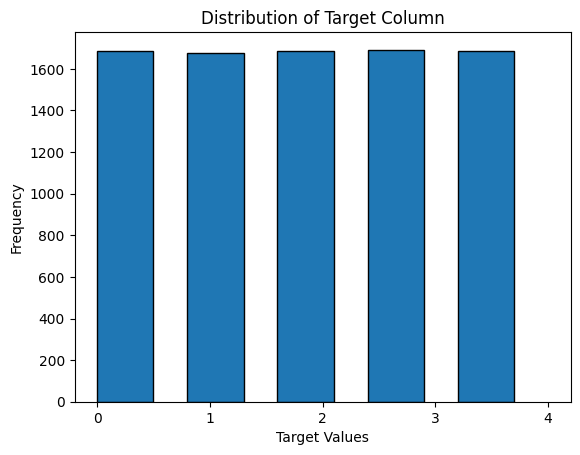

In [17]:
plt.hist(df['Label'], bins=5, edgecolor='black', align='mid', width=0.5)
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Distribution of Target Column')
plt.xticks(range(5))
plt.show()

In [18]:
len(df)

8427

In [19]:
correlations = df.corr()['Label'].sort_values(ascending=False)
print(correlations)

for l in correlations.keys():
    if abs(correlations[l])<0.1:
        correlations.pop(l)
print(len(correlations))

Label                1.000000
CH23_S-sd            0.280048
CH22_A-PEAK          0.258817
CH22_V-range         0.257983
CH22_A-P2P           0.257854
                       ...   
CH25_slopeRR        -0.142960
CH22_Sim-corr       -0.155216
CH22_A-MINLocMinV   -0.220684
CH23_Sim-corr       -0.228559
CH24_Sim-corr       -0.295248
Name: Label, Length: 160, dtype: float64
57


In [20]:
for column in df.columns:
    if column not in correlations.keys():
        df.drop(column, axis=1, inplace=True)

In [21]:
X = df.drop('Label', axis=1)
y = df['Label']
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
print(len(X_scaled), len(y))

8427 8427


In [23]:
pca = PCA(n_components=14)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(14)])
#df_final = pd.concat([df_pca, y], axis=1)

In [24]:
len(df_pca)

8427

In [25]:
df_pca['Label']=y

In [26]:
print(len(X_pca))

8427


In [27]:
df_final=df_pca

In [28]:
len(df_final)

8427

In [29]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.27919948 0.16722615 0.09030387 0.07306148 0.0659796  0.05401504
 0.03965764 0.03514176 0.02356343 0.02141931 0.01841116 0.01701121
 0.01497354 0.01458987]


In [30]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
desired_variance = 0.90
num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1
print("Number of components to retain:", num_components)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

Number of components to retain: 14
Cumulative explained variance ratio: [0.27919948 0.44642562 0.53672949 0.60979098 0.67577057 0.72978561
 0.76944326 0.80458502 0.82814845 0.84956776 0.86797893 0.88499014
 0.89996368 0.91455355]


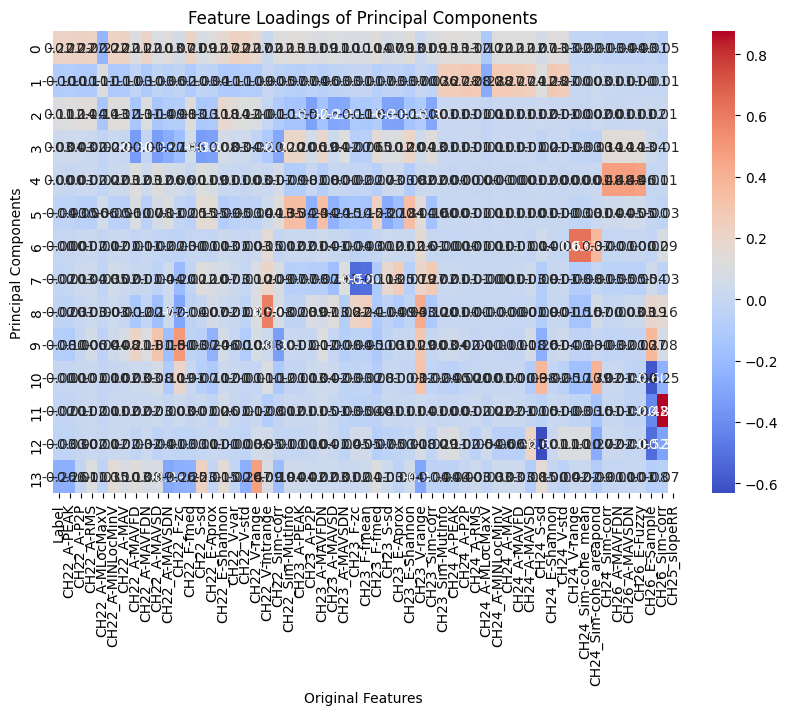

In [54]:
loadings = pca.components_
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=df.columns)
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Feature Loadings of Principal Components')
plt.show()

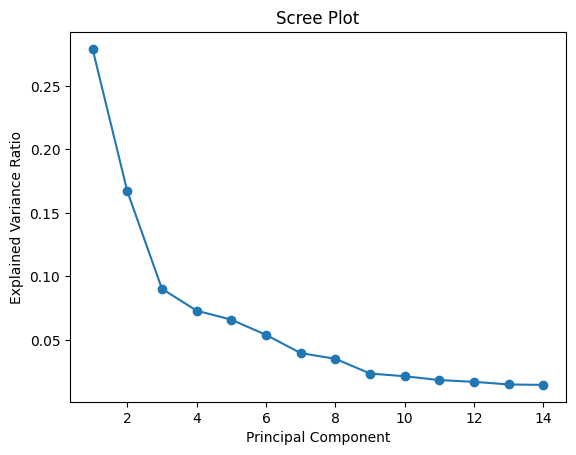

In [31]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [56]:
abs_loadings_sum = np.sum(np.abs(loadings), axis=0)

sorted_features = sorted(range(len(abs_loadings_sum)), key=lambda i: abs_loadings_sum[i], reverse=True)
top_n = 10
selected_features = sorted_features[:top_n]

traces = []
for i in range(len(loadings)):
    trace = go.Bar(
        x=df.columns[selected_features],
        y=loadings[i, selected_features],
        name=f'PC{i+1}'
    )
    traces.append(trace)

fig = go.Figure(data=traces)

fig.update_layout(
    barmode='group',
    title='Feature Loadings of Principal Components',
    xaxis_title='Features',
    yaxis_title='Loadings',
    hovermode='closest',
    showlegend=True
)

fig.write_html('plot2.html')

In [32]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Label
0,2.618845,-2.220435,-0.550443,-0.705253,-0.059060,-0.538193,-0.558203,3.114330,0.817077,-0.503398,-1.682582,0.362131,0.149439,0.407736,1.0
1,4.065980,0.216594,-0.485811,-0.736000,1.554581,0.358688,3.925577,4.501942,5.125625,1.208668,0.320098,-0.489826,1.170047,-0.605917,0.0
2,3.342398,-0.400732,-0.442553,0.237103,3.316359,-0.448557,0.030994,2.584037,0.505951,-1.219425,-0.707402,-0.293165,-0.277750,0.506042,2.0
3,0.686712,-1.818279,-1.485704,-0.658264,1.004505,0.375986,0.586624,3.052425,2.035768,0.083249,-0.493929,0.105747,0.293173,-1.013683,1.0
4,-0.111686,-0.986209,-1.593506,1.443258,9.948214,1.089994,1.781461,1.385875,0.933440,-1.412662,1.054692,1.363246,0.948089,-1.020407,0.0


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8427 entries, 0 to 8426
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     8427 non-null   float64
 1   PC2     8427 non-null   float64
 2   PC3     8427 non-null   float64
 3   PC4     8427 non-null   float64
 4   PC5     8427 non-null   float64
 5   PC6     8427 non-null   float64
 6   PC7     8427 non-null   float64
 7   PC8     8427 non-null   float64
 8   PC9     8427 non-null   float64
 9   PC10    8427 non-null   float64
 10  PC11    8427 non-null   float64
 11  PC12    8427 non-null   float64
 12  PC13    8427 non-null   float64
 13  PC14    8427 non-null   float64
 14  Label   8354 non-null   float64
dtypes: float64(15)
memory usage: 987.7 KB


In [72]:
df_final.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Label
count,8.427000e+03,8.427000e+03,8427.000000,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8.427000e+03,8354.000000
mean,1.349078e-17,-3.372696e-18,0.000000,2.360887e-17,1.349078e-17,1.349078e-17,-8.642534e-18,2.360887e-17,-1.349078e-17,1.011809e-17,-1.011809e-17,-1.686348e-18,2.360887e-17,-2.107935e-17,2.002993
std,3.954368e+00,3.060355e+00,2.248915,2.022852e+00,1.922315e+00,1.739311e+00,1.490333e+00,1.402916e+00,1.148786e+00,1.095273e+00,1.015454e+00,9.760844e-01,9.157607e-01,9.039524e-01,1.414253
min,-4.949601e+00,-2.390947e+01,-13.752917,-6.511657e+00,-6.799244e+00,-9.301549e+00,-1.209020e+01,-6.268526e+00,-4.096068e+00,-3.519603e+00,-4.285732e+00,-1.112895e+01,-4.279149e+00,-5.607071e+00,0.000000
25%,-2.250640e+00,-9.344400e-01,-1.510384,-1.411893e+00,-8.431822e-01,-1.014772e+00,-6.164784e-01,-7.882190e-01,-6.651280e-01,-7.139671e-01,-7.163329e-01,-5.072099e-01,-6.153130e-01,-3.454589e-01,1.000000
50%,-1.122791e+00,-3.878642e-01,-0.084887,-1.283750e-01,-3.231877e-01,-9.404552e-02,-4.366163e-02,9.327764e-02,-1.049403e-01,-1.587879e-02,-9.306353e-02,-3.820948e-02,-6.437420e-03,4.496687e-02,2.000000
75%,6.894683e-01,2.786850e-01,1.440152,1.304442e+00,2.543776e-01,7.911942e-01,5.726172e-01,8.794335e-01,4.936819e-01,6.743372e-01,6.365646e-01,5.126587e-01,5.766257e-01,4.180898e-01,3.000000
max,5.360752e+01,4.034703e+01,21.292612,1.481439e+01,3.356756e+01,2.828078e+01,2.435006e+01,9.779808e+00,1.088048e+01,6.494662e+00,7.632646e+00,1.307209e+01,5.347100e+00,2.206827e+01,4.000000


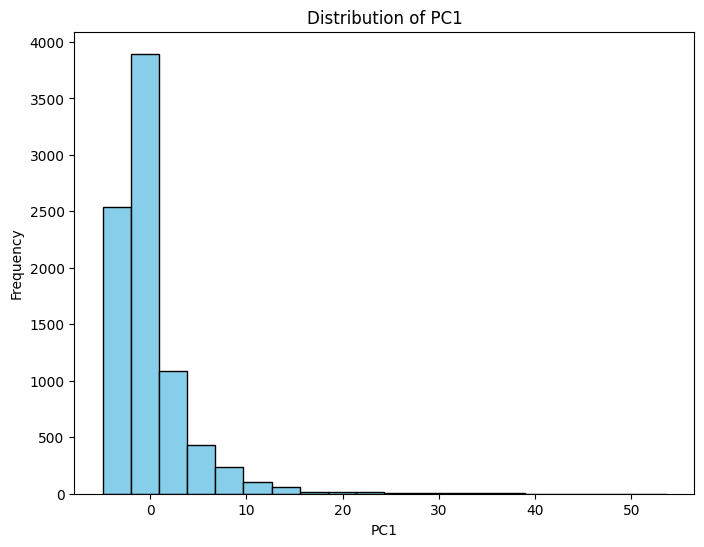

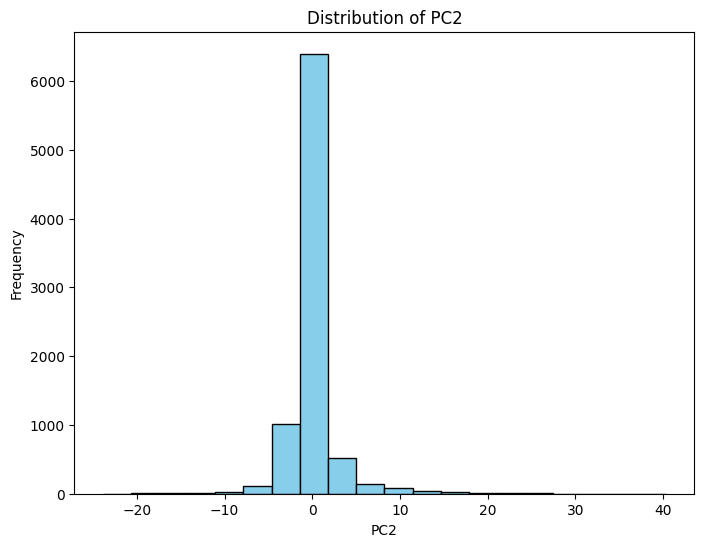

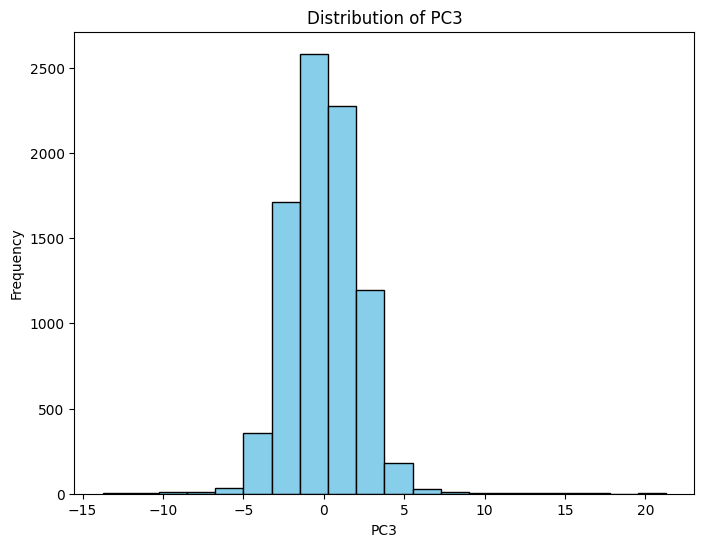

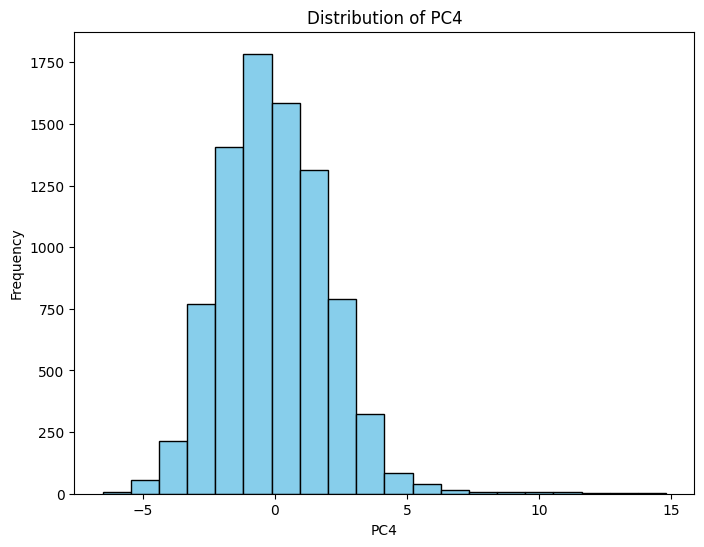

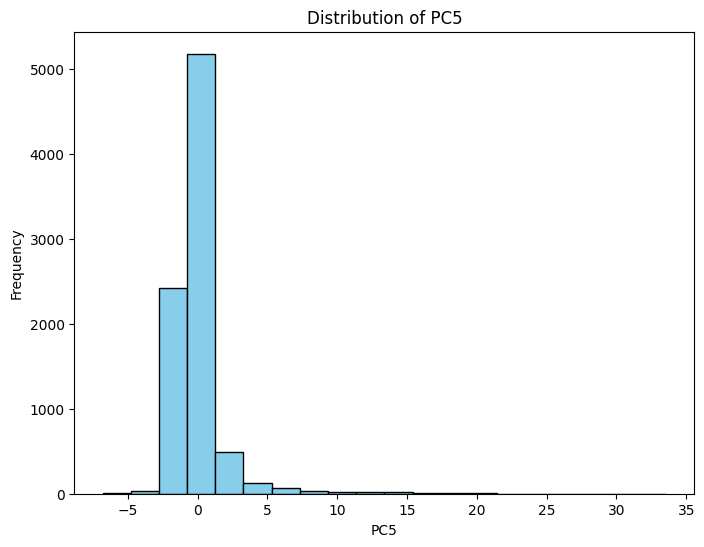

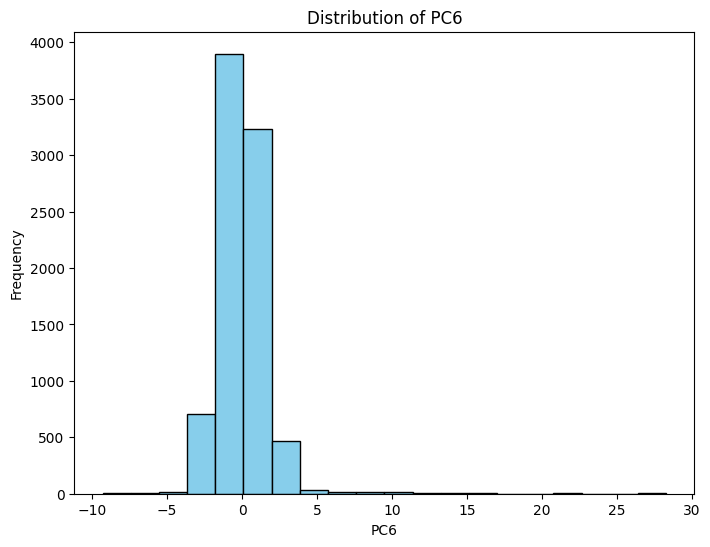

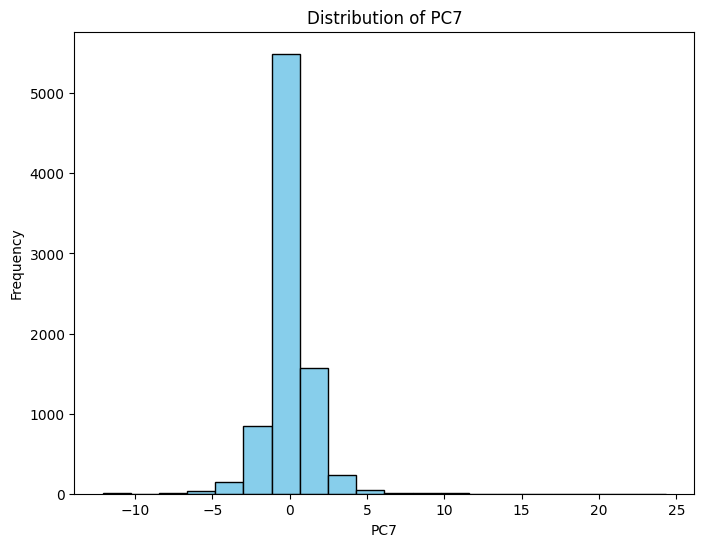

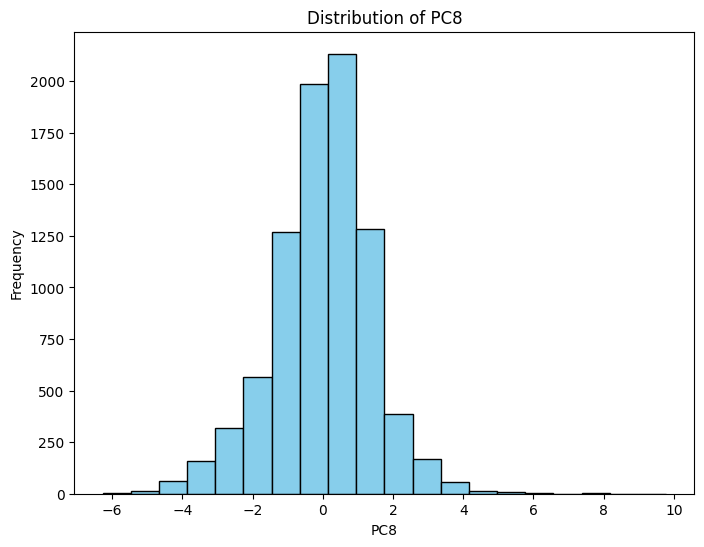

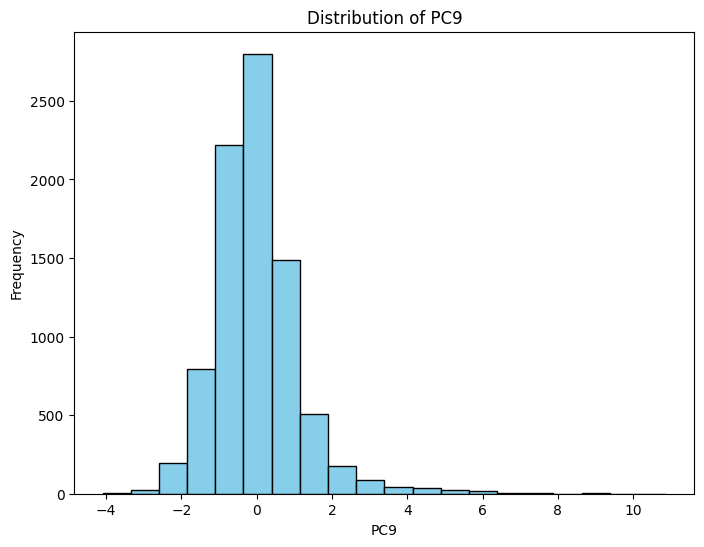

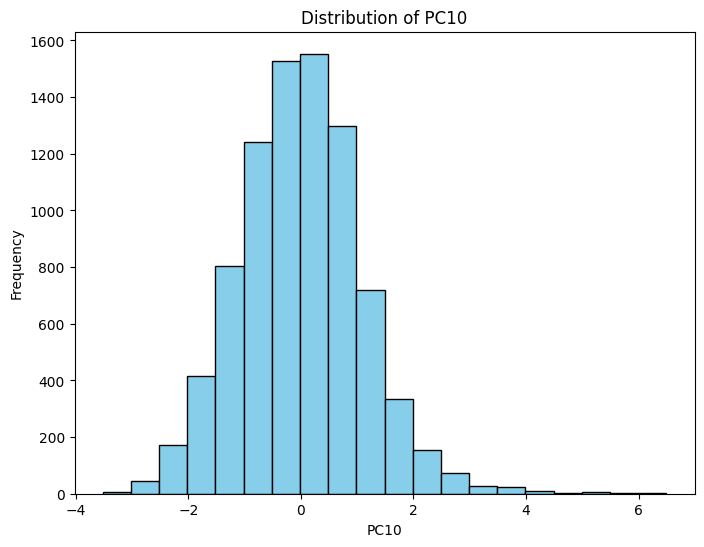

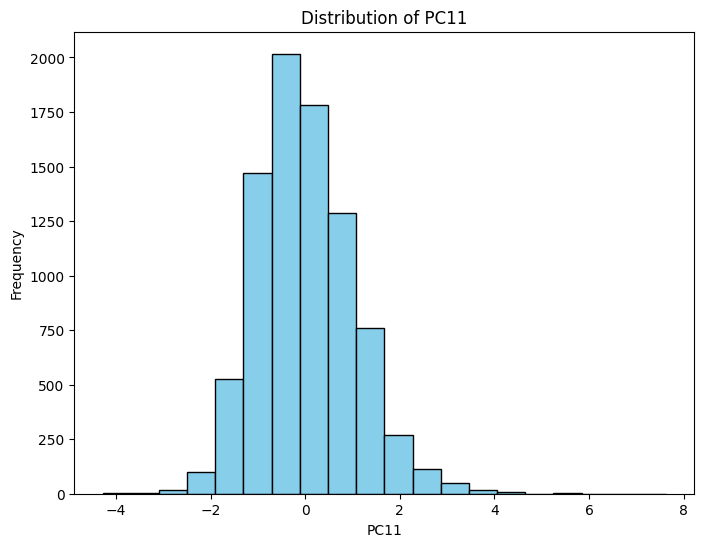

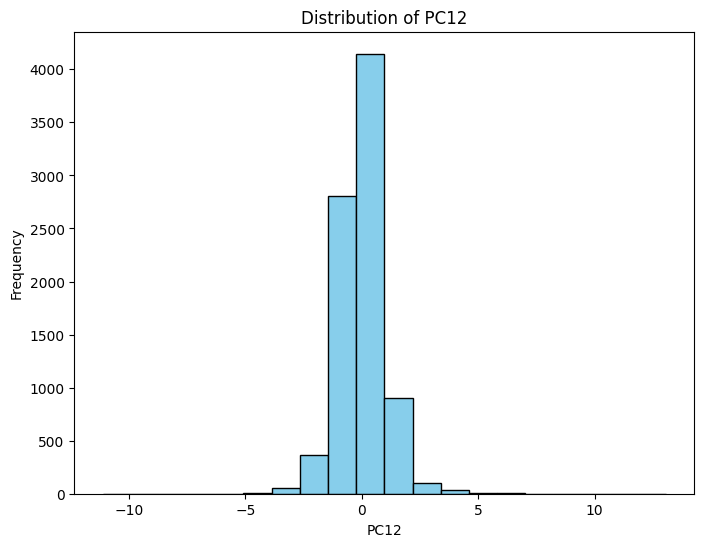

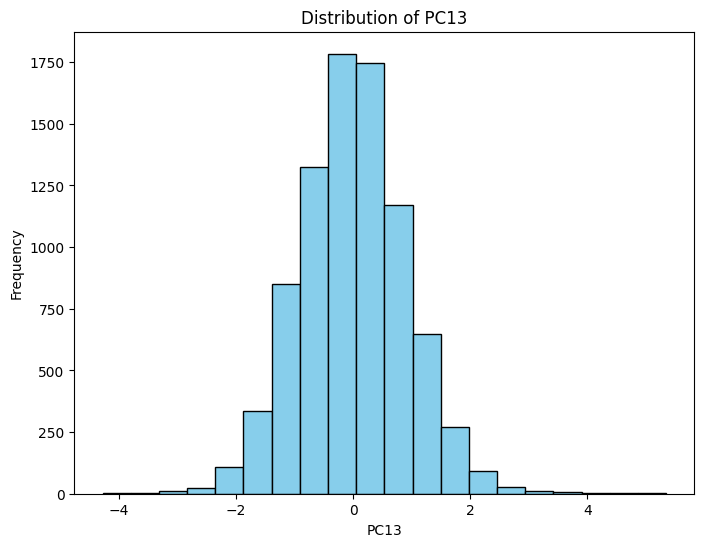

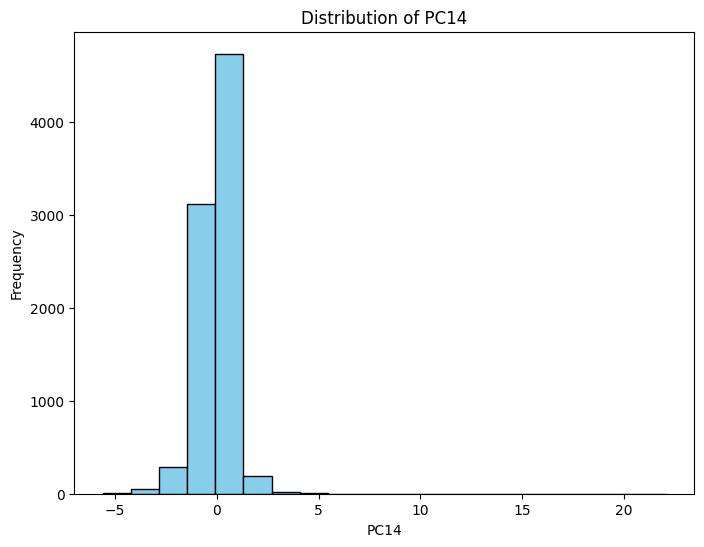

In [73]:
for column in df_final.drop('Label', axis=1).columns:
    plt.figure(figsize=(8, 6))
    df_final[column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [74]:
from scipy.stats import yeojohnson, mstats

df_new = pd.DataFrame()
for column in df_final.drop('Label', axis=1).columns:
    winsorized_data = mstats.winsorize(df_final.drop('Label', axis=1)[column], limits=[0.05, 0.05])
    df_new[column]=winsorized_data

for column in df_new:
    transformed_data, lambda_value = yeojohnson(df_new[column])
    df_new[column]=transformed_data

df_new = pd.DataFrame(scaler.fit_transform(df_new), columns=[f'PC{i+1}' for i in range(14)])

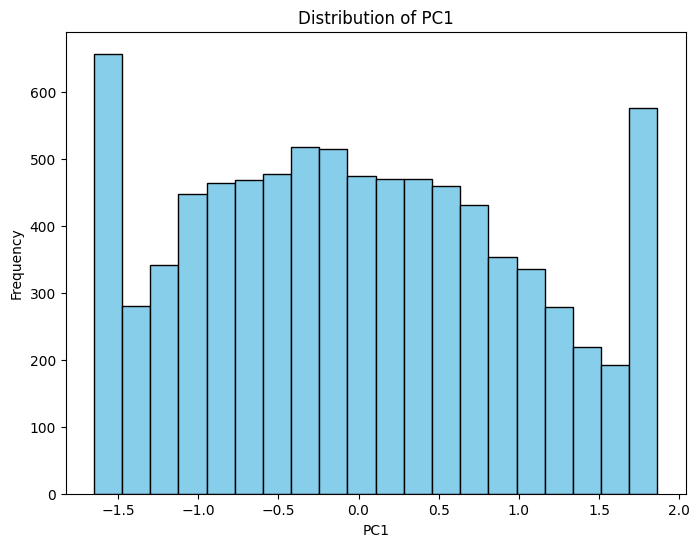

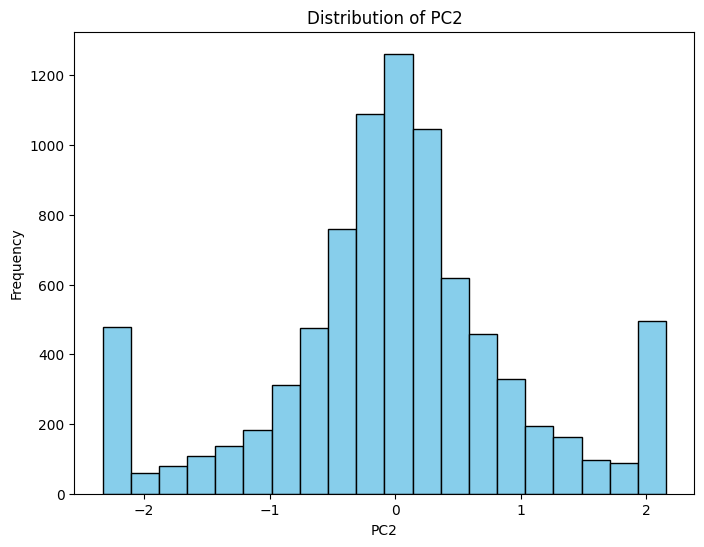

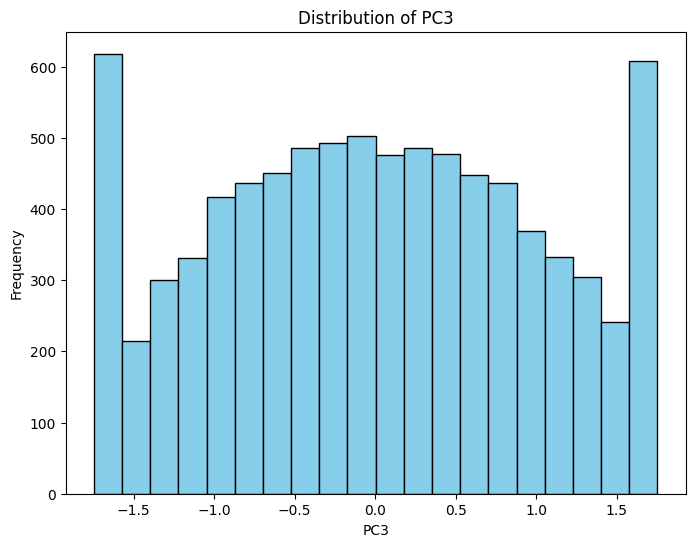

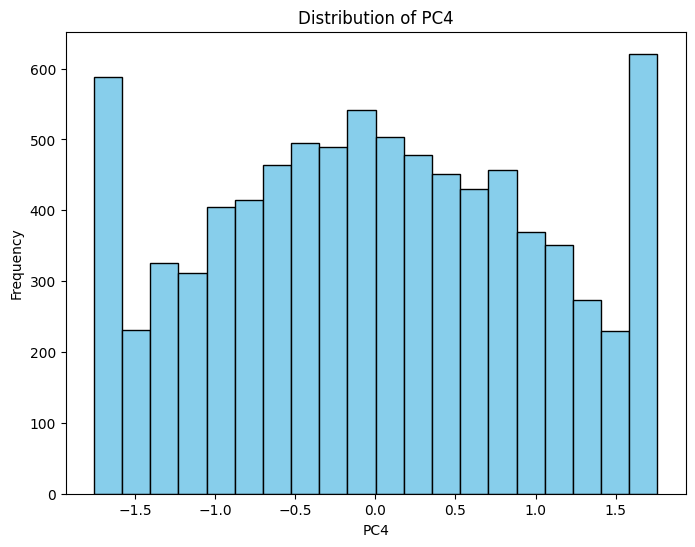

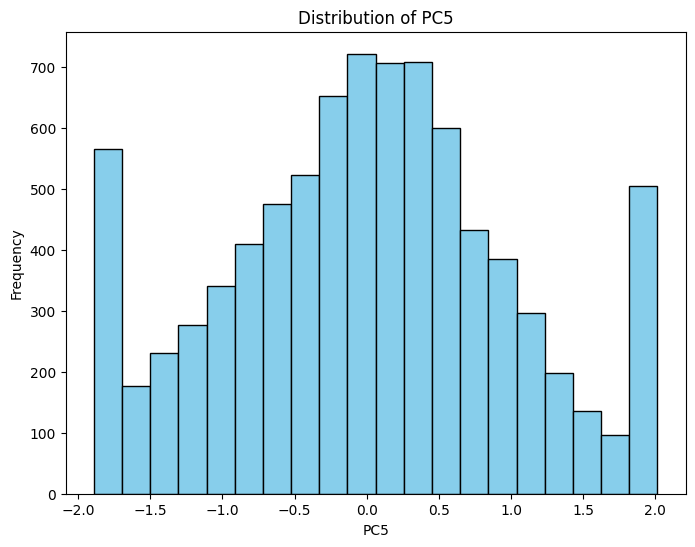

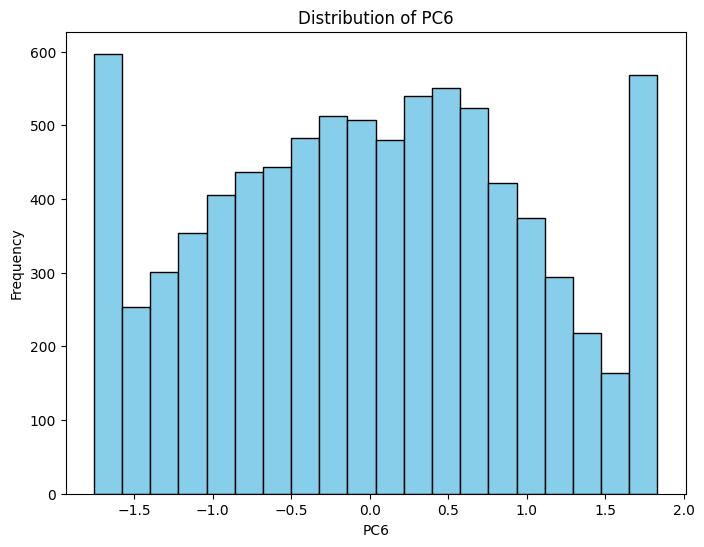

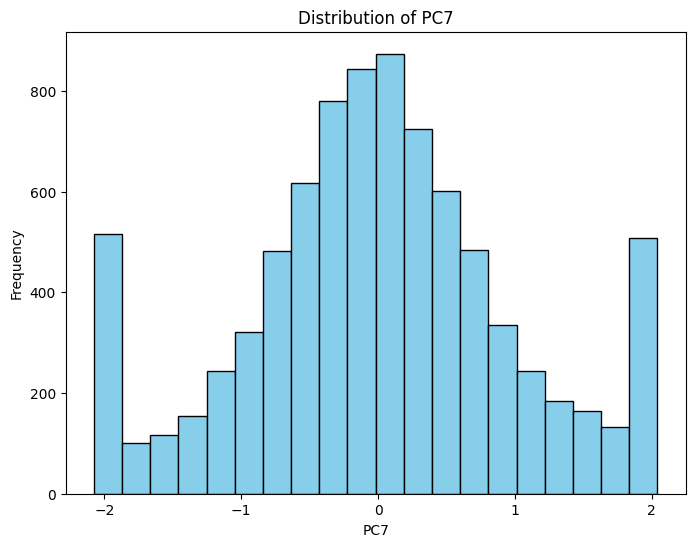

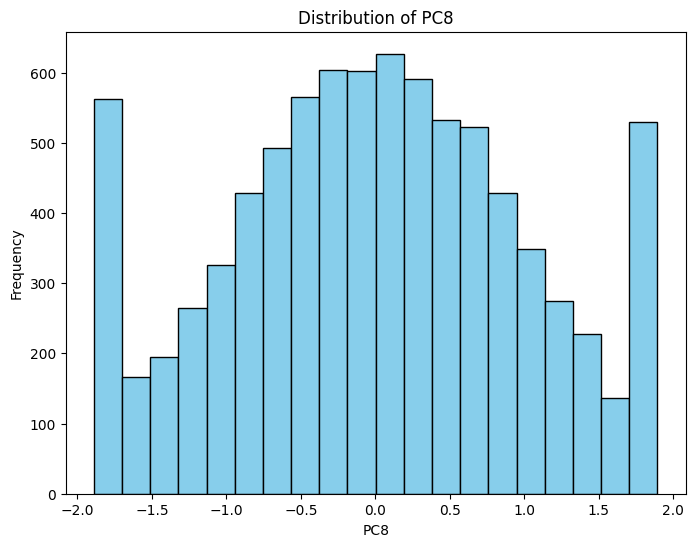

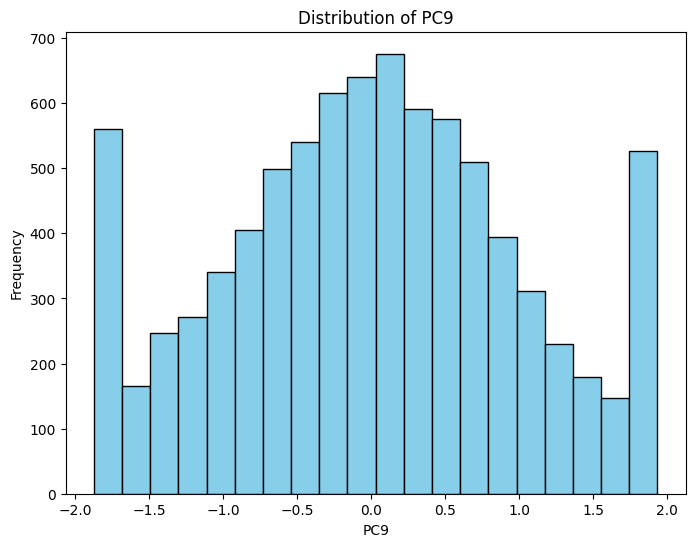

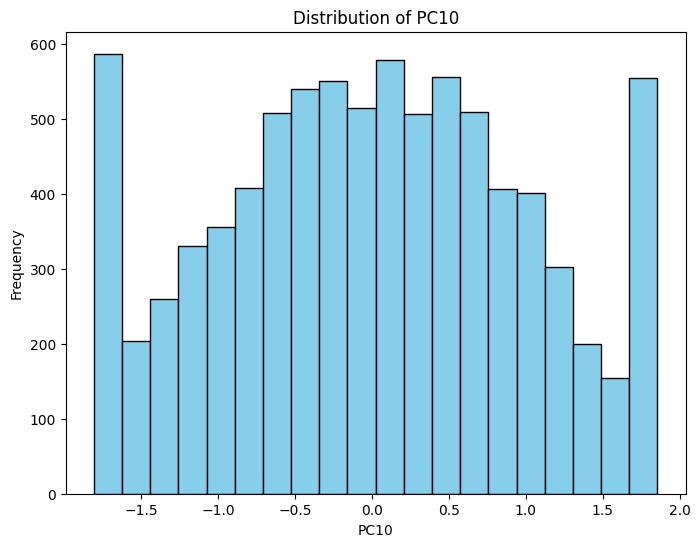

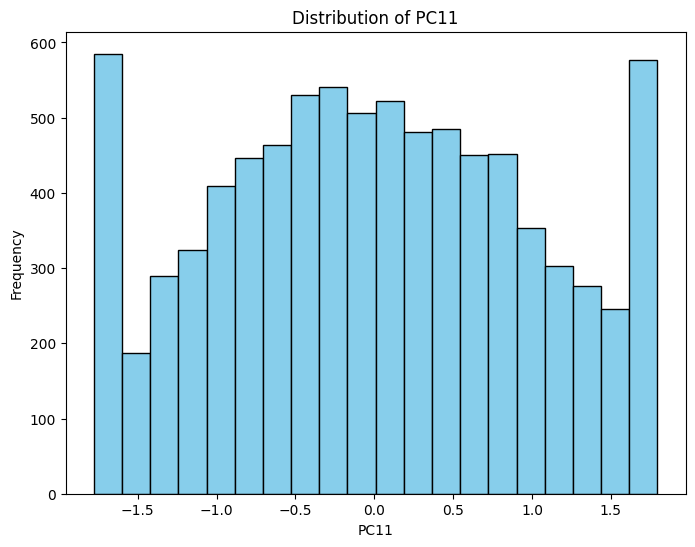

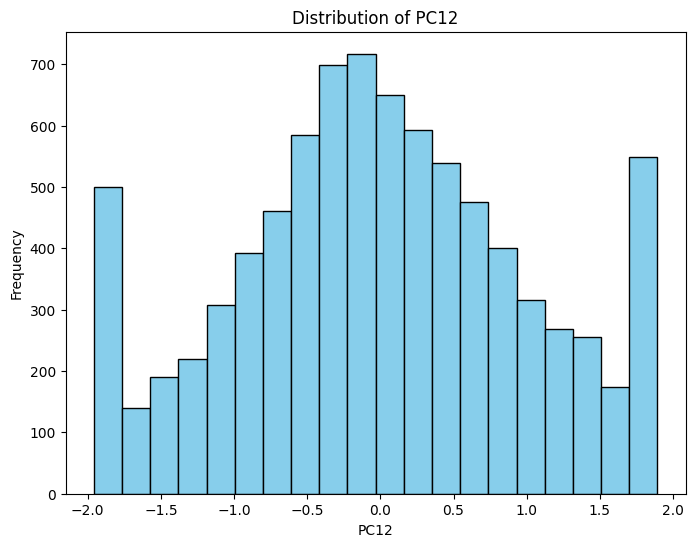

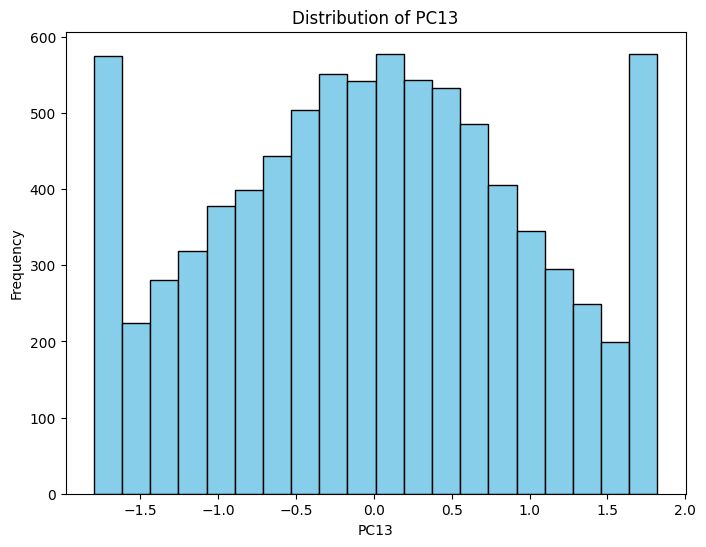

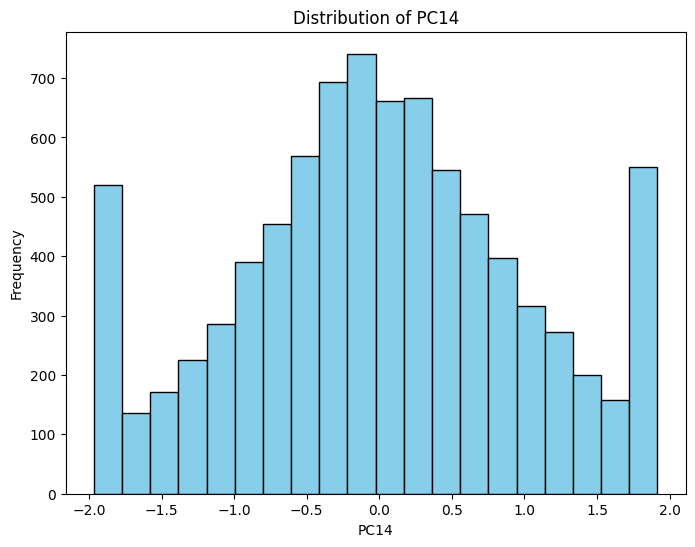

In [75]:
for column in df_new.columns:
    plt.figure(figsize=(8, 6))
    df_new[column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [38]:
def precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

In [48]:
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(14,), kernel_regularizer=regularizers.l2(0.001)),
#    Dropout(0.3),
#    BatchNormalization(),
#    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#    BatchNormalization(),
#    Dropout(0.3),
#    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#    BatchNormalization(),
#    Dropout(0.3),
#    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#    BatchNormalization(),
#    Dropout(0.3),
#    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#    BatchNormalization(),
#    Dropout(0.3),
#    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#    BatchNormalization(),
#    Dropout(0.3),
#    Dense(64, activation='relu'),
#    BatchNormalization(),
#    Dropout(0.3),
    Dense(64, activation='relu'),
#    BatchNormalization(),
    Dense(32, activation='relu'),
#    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', precision])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1920      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 5)                 85        
                                                                 
Total params: 12869 (50.27 KB)
Trainable params: 12869 (50.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
y = np.array(df['Label'])
y_one_hot = to_categorical(y, num_classes=5)
print(y_one_hot[:5])

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [50]:
X = df_final.drop('Label', axis=1)
#X=df_new

In [51]:
len(y_one_hot)

8427

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3)
history = model1.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])
loss, accuracy, precision = model1.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')

Epoch 1/200
185/185 [==============================] - 2s 3ms/step - loss: 1.5313 - accuracy: 0.3201 - precision: 0.5155 - val_loss: 1.4473 - val_accuracy: 0.3820 - val_precision: 0.6654 - lr: 0.0010
Epoch 2/200
185/185 [==============================] - 1s 3ms/step - loss: 1.3993 - accuracy: 0.3866 - precision: 0.7094 - val_loss: 1.4076 - val_accuracy: 0.3863 - val_precision: 0.7185 - lr: 0.0010
Epoch 3/200
185/185 [==============================] - 0s 2ms/step - loss: 1.3613 - accuracy: 0.3978 - precision: 0.7170 - val_loss: 1.3903 - val_accuracy: 0.4029 - val_precision: 0.6394 - lr: 0.0010
Epoch 4/200
185/185 [==============================] - 0s 2ms/step - loss: 1.3444 - accuracy: 0.4057 - precision: 0.7146 - val_loss: 1.3760 - val_accuracy: 0.3950 - val_precision: 0.7164 - lr: 0.0010
Epoch 5/200
185/185 [==============================] - 0s 2ms/step - loss: 1.3262 - accuracy: 0.4106 - precision: 0.7073 - val_loss: 1.4298 - val_accuracy: 0.3756 - val_precision: 0.6705 - lr: 0.0010


In [53]:
X_train.shape

(5898, 14)

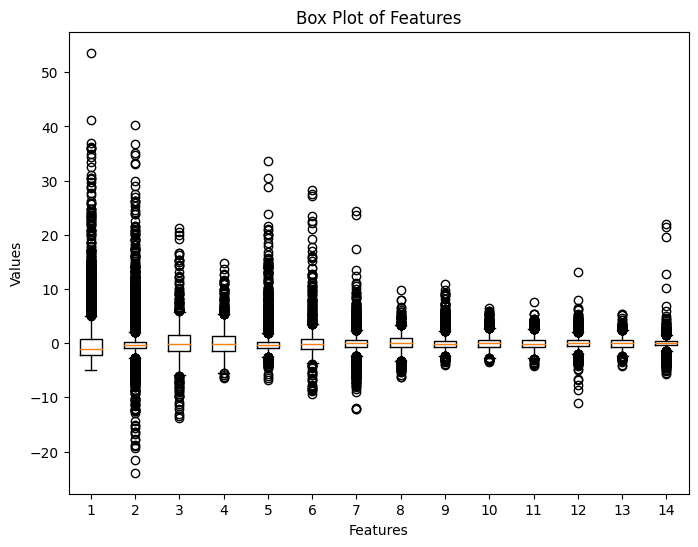

In [54]:
import matplotlib.pyplot as plt

def plot_boxplot(data):
    """
    Plot a box plot for the given data.
    
    Parameters:
        data (array-like): Input data array.
    """
    # Create a box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data)
    
    # Add labels and title
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title('Box Plot of Features')
    
    # Show the plot
    plt.show()



plot_boxplot(X)


In [55]:
df.head()

,Label,CH22_A-PEAK,CH22_A-P2P,CH22_A-RMS,CH22_A-MLocMaxV,CH22_A-MINLocMinV,CH22_A-MAV,CH22_A-MAVFD,CH22_A-MAVFDN,CH22_A-MAVSD,...,CH24_V-range,CH24_Sim-cohe_mean,CH24_Sim-cohe_areapond,CH24_Sim-corr,CH26_A-MAVFDN,CH26_A-MAVSDN,CH26_E-Fuzzy,CH26_E-Sample,CH26_Sim-corr,CH25_slopeRR
0,1,91.532011,216.377139,25.108181,17.918435,-19.479958,18.065177,13.748699,0.547532,15.071379,...,18.946782,0.314880,80.627434,0.002349,0.008796,0.014768,0.005441,0.003992,0.962237,0.008705
1,0,95.288535,237.124994,27.743774,20.800830,-21.690189,20.929211,15.579207,0.561481,16.933249,...,262.958818,0.384702,98.618740,0.080583,0.032768,0.056143,0.031293,0.026821,0.982074,-0.001395
2,2,91.916364,273.061283,24.903474,19.505845,-18.741006,17.921856,13.756612,0.552545,14.913142,...,169.098033,0.328660,84.160309,0.015129,0.070044,0.120869,0.066848,0.055802,0.845082,-0.011049
3,1,55.900607,134.244146,12.515714,9.260838,-9.729519,9.053227,6.794337,0.542809,7.667441,...,15.500973,0.332703,85.157920,0.019228,0.031495,0.053892,0.024733,0.017767,0.950662,0.003013
4,0,63.693844,135.659641,8.645820,6.745312,-6.013200,5.575954,4.931330,0.570515,6.646904,...,27.483238,0.361199,92.538817,0.055154,0.180367,0.308990,0.204341,0.185831,0.132647,0.016183


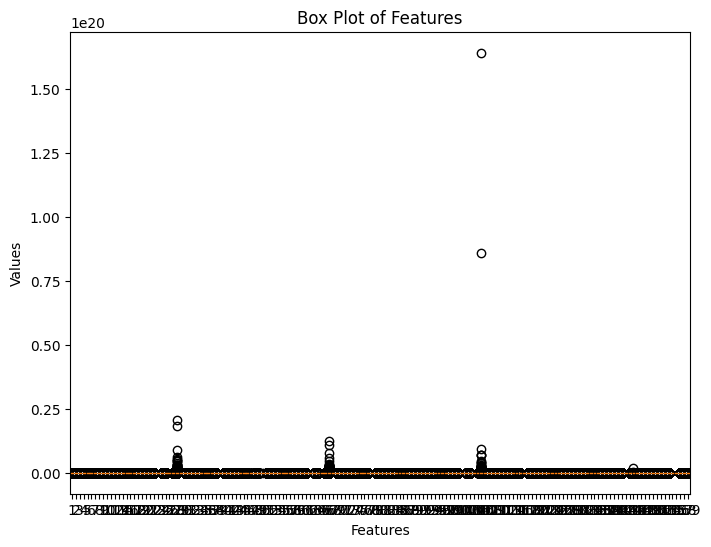

In [541]:
plot_boxplot(df.drop('Label', axis=1))

In [56]:
df.columns[:10]

Index(['Label', 'CH22_A-PEAK', 'CH22_A-P2P', 'CH22_A-RMS', 'CH22_A-MLocMaxV',
       'CH22_A-MINLocMinV', 'CH22_A-MAV', 'CH22_A-MAVFD', 'CH22_A-MAVFDN',
       'CH22_A-MAVSD'],
      dtype='object')

In [58]:
y_pred = model1.predict(X_test)

80/80 [==============================] - 0s 1ms/step


In [59]:
i=3
print(y_pred[i], y_test[i])

[3.2443920e-14 6.7801120e-06 7.8647790e-05 1.1822217e-03 9.9873239e-01] [0. 0. 0. 0. 1.]


In [60]:
np.argmax(y_pred[3])

4

In [61]:
y_pred_actual=[]
for i in range(len(y_pred)):
    ind = np.argmax(y_pred[i])
    l=[0,0,0,0,0]
    l[ind]=1
    y_pred_actual.append(l)

In [62]:
def precision(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Cast to float32 if not already
    y_pred = tf.cast(y_pred, tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision
precision(y_test, y_pred).numpy()

0.48023006

In [63]:
len(y_test)

2529

In [64]:
y_ = model1.predict(X)

y_actual=[]
for i in range(len(y_)):
    ind = np.argmax(y_[i])
    l=[0,0,0,0,0]
    l[ind]=1
    y_actual.append(l)

precision(y_one_hot, y_actual).numpy()

264/264 [==============================] - 0s 1ms/step


0.582295

In [81]:
for i in range(30):
    print(y_one_hot[i], y_actual[i], y_[i])

[0. 1. 0. 0. 0.] [0, 0, 0, 1, 0] [0.04024484 0.20258904 0.23826782 0.26231247 0.25658572]
[1. 0. 0. 0. 0.] [1, 0, 0, 0, 0] [0.26453522 0.12909669 0.21833411 0.21475057 0.17328334]
[0. 0. 1. 0. 0.] [0, 0, 1, 0, 0] [0.03913039 0.2313264  0.25762975 0.24867277 0.22324073]
[0. 1. 0. 0. 0.] [1, 0, 0, 0, 0] [0.29709998 0.17064519 0.2432349  0.17823061 0.11078928]
[1. 0. 0. 0. 0.] [1, 0, 0, 0, 0] [0.58814687 0.09669336 0.12172412 0.112027   0.0814086 ]
[0. 1. 0. 0. 0.] [1, 0, 0, 0, 0] [0.29616228 0.16971134 0.23926482 0.17853075 0.11633081]
[1. 0. 0. 0. 0.] [1, 0, 0, 0, 0] [0.49162227 0.12353009 0.16765146 0.12998877 0.0872074 ]
[0. 0. 1. 0. 0.] [1, 0, 0, 0, 0] [0.31672016 0.23722161 0.21361189 0.16653113 0.06591526]
[0. 0. 0. 0. 1.] [0, 0, 0, 0, 1] [0.00628915 0.13004766 0.18925329 0.26150838 0.41290152]
[0. 0. 0. 1. 0.] [0, 0, 1, 0, 0] [0.2503774  0.19476126 0.2629131  0.18230839 0.10963988]
[0. 0. 0. 0. 1.] [1, 0, 0, 0, 0] [0.33042204 0.15694536 0.2230676  0.1769619  0.11260309]
[0. 0. 1. 

In [82]:
y

array([1, 0, 2, ..., 4, 2, 4], dtype=int64)

In [67]:
model1.save("model1")

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [65]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(14,), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', precision])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1920      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_16 (Dense)            (None, 512)               66048     
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)              

In [66]:
history = model2.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])
loss, accuracy, precision = model2.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')

Epoch 1/200
185/185 [==============================] - 7s 11ms/step - loss: 2.7127 - accuracy: 0.2084 - precision: 0.1328 - val_loss: 2.6147 - val_accuracy: 0.2060 - val_precision: 0.1625 - lr: 0.0010
Epoch 2/200
185/185 [==============================] - 2s 8ms/step - loss: 2.6251 - accuracy: 0.2377 - precision: 0.2703 - val_loss: 2.5624 - val_accuracy: 0.2792 - val_precision: 0.4981 - lr: 0.0010
Epoch 3/200
185/185 [==============================] - 2s 9ms/step - loss: 2.5597 - accuracy: 0.2781 - precision: 0.4883 - val_loss: 2.4382 - val_accuracy: 0.3456 - val_precision: 0.6369 - lr: 0.0010
Epoch 4/200
185/185 [==============================] - 2s 13ms/step - loss: 2.4800 - accuracy: 0.3208 - precision: 0.5375 - val_loss: 2.3713 - val_accuracy: 0.3658 - val_precision: 0.6484 - lr: 0.0010
Epoch 5/200
185/185 [==============================] - 2s 10ms/step - loss: 2.4083 - accuracy: 0.3401 - precision: 0.6055 - val_loss: 2.3201 - val_accuracy: 0.3622 - val_precision: 0.6689 - lr: 0.00

In [68]:
model2.save("model2")

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [85]:
model3 = Sequential([
    Dense(32, activation='relu', input_shape=(14,), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', precision])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                480       
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_11 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_12 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_32 (Dense)            (None, 16)               

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3)
history = model3.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr])
loss, accuracy, precision = model3.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')

Epoch 1/200


ValueError: in user code:

    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py", line 1085, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py", line 1179, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "c:\users\aditya\appdata\local\programs\python\python38\lib\site-packages\keras\src\metrics\__init__.py", line 215, in get
        raise ValueError(f"Could not interpret metric identifier: {identifier}")

    ValueError: Could not interpret metric identifier: 0.7629653215408325
